# Transformers

## Introduction
Most modern language modeling methods rely on the Transformer architecture: BERT, GPT, and their variations.  
Transformers use attention as the fundamental building blocks that make up their structure. In recent years, the application of attention-based architectures has extended beyond natural languages to include tasks like Visual Transformers for images, Codex, and similar models for source code.
In addition to attention blocks, transformers typically use more advanced tokenization methods like BPE. As this type of model has been a state-of-the-art solution for many tasks in various fields for several years (which is a long time in deep learning), the tooling in this area is also advanced. Let's dive into all of this. :)

Useful links:
1. [Original Transformer Paper](https://arxiv.org/abs/1706.03762)
2. [BERT Paper](https://arxiv.org/abs/1810.04805)
3. [GPT Paper](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf)
4. [Blog Post on seq2seq and attention](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#Subword%20Segmentation:%20Byte%20Pair%20Encoding)
5. https://peterbloem.nl/blog/transformers
6. http://jalammar.github.io/illustrated-transformer/


### Seminar Plan
1. Explore different examples of text tokenization and review the BERT architecture.
2. Study the libraries from Hugging Face.
3. Use a pre-trained model using Hugging Face pipelines.

## 1. Explore Different Examples of Text Tokenization and Review the BERT Architecture
Before training any model, we need to convert text into numbers. This process is called vectorization and involves tokenization and embedding. We've already discussed basic approaches to tokenization: breaking down text into individual characters, character n-grams, or whole words (where we can apply familiar techniques like stemming and lemmatization). As for building embeddings, we discussed examples like Word2Vec and FastText.

Transformers have their own way of doing things: they use the byte-pair encoding (BPE) algorithm for tokenization, and embedding construction is part of the model itself.

Let's take a look at this with some illustrations.

### Tokenizers


#### Symbol-level

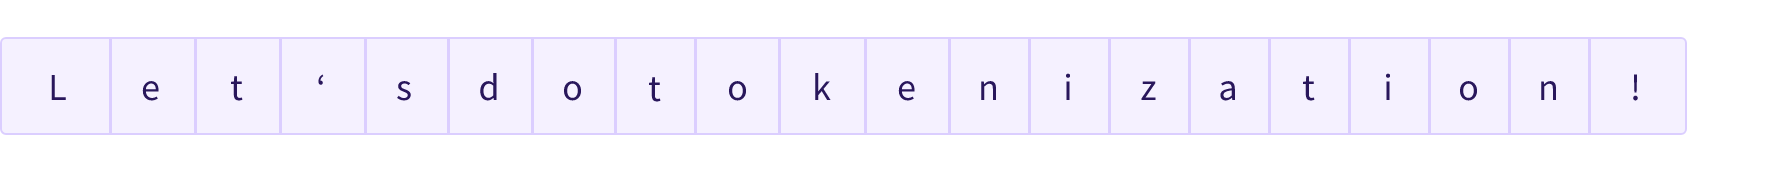

---
#### Word-level
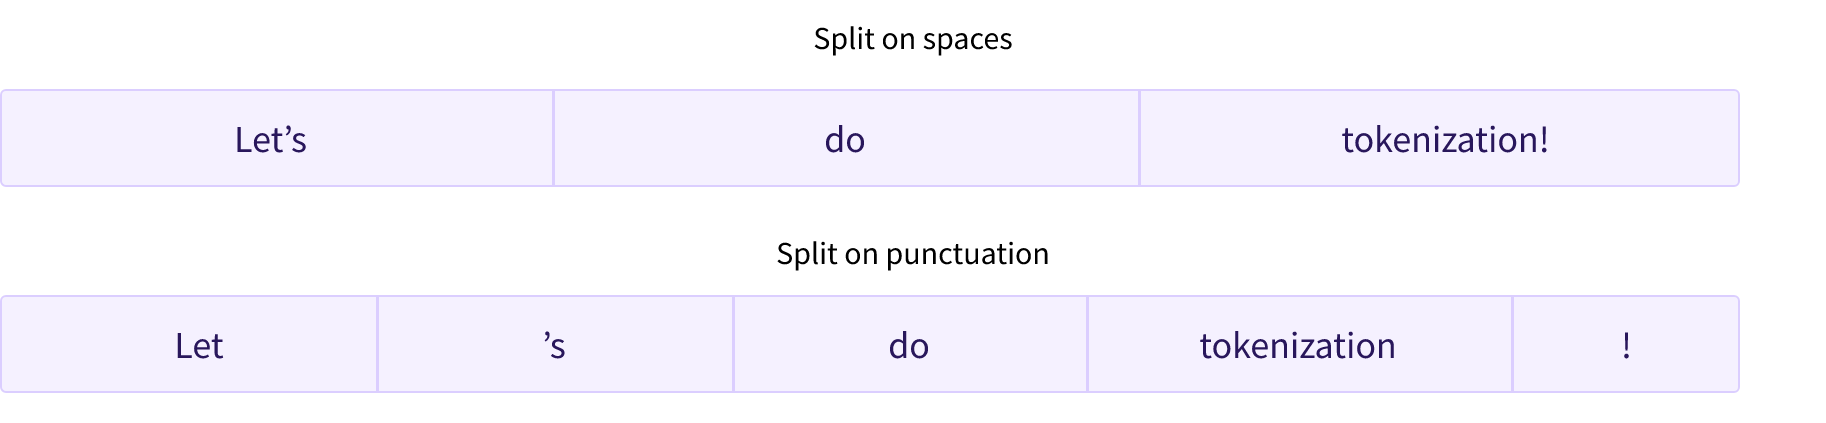

---
#### Byte-pair encoding
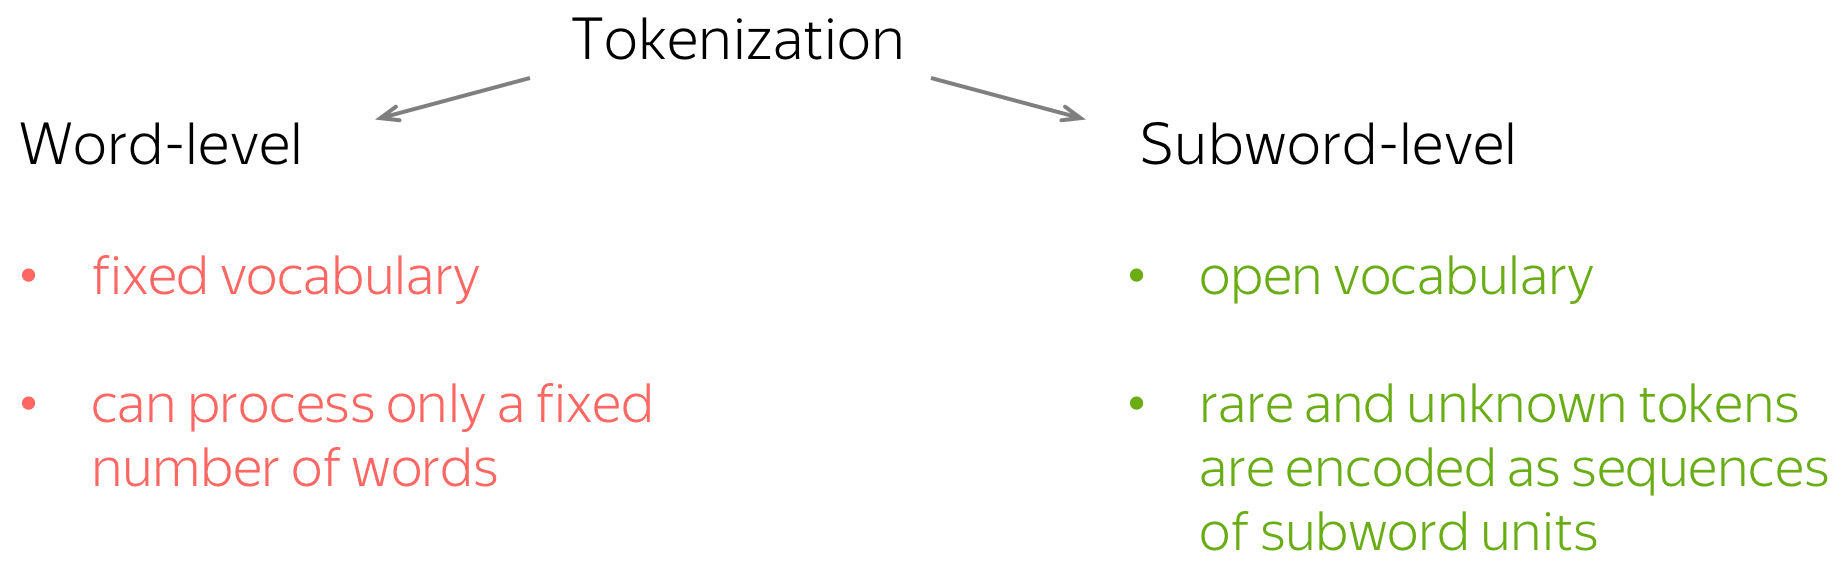

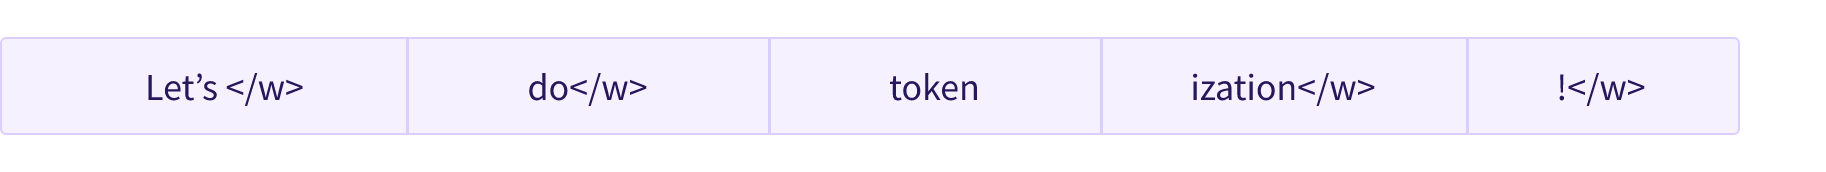

- [BPE explanations in Transformers documentation](https://huggingface.co/docs/transformers/en/tokenizer_summary)

### BERT — Bidirectional Encoder Representations from Transformers

BERT - a neural network developed by Google that achieved state-of-the-art results across various tasks in 2017-2018.
This model is widely used in different applications involving natural language processing, such as answering questions posed in arbitrary forms, chatbots, grammar and style analyzers, automatic translators, and more.
The key role in the architecture is played by self-attention.

#### Transformer: base architecture

![image.png](http://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png)

#### Encoder
![image.png](http://jalammar.github.io/images/t/encoder_with_tensors.png)

# Understanding Self-Attention

Self-attention is a mechanism that allows a model to focus on different parts of the input sequence when processing each element. It is commonly used in transformer architectures. The self-attention mechanism can be mathematically described as follows:

## 1. Compute Query, Key, and Value Vectors

For a sequence of input vectors $ X = [x_1, x_2, ..., x_n] $, compute the Query ($ Q $), Key ($ K $), and Value ($ V $) vectors using linear transformations:

$ Q_i = X_i \cdot W_Q, \quad K_i = X_i \cdot W_K, \quad V_i = X_i \cdot W_V $

Here, $ W_Q, W_K, W_V $ are learnable weight matrices.

## 2. Calculate Attention Scores

Compute the attention scores ($ \text{Attention}(Q_i, K_j) $) for each pair of elements in the sequence:

$ \text{Attention}(Q_i, K_j) = \frac{Q_i \cdot K_j^T}{\sqrt{d_k}} $

Here, $ d_k $ is the dimension of the Key vectors.

## 3. Apply Softmax

Apply the softmax function to the attention scores to obtain weights ($ \alpha_{ij} $) that indicate the importance of each element:

$ \alpha_{ij} = \text{softmax}(\text{Attention}(Q_i, K_j)) $

## 4. Compute Weighted Sum

Compute the weighted sum of the Value vectors using the obtained weights:

$ \text{SelfAttention}(X)_i = \sum_{j=1}^{n} \alpha_{ij} \cdot V_j $

This weighted sum represents the attended information for the $i$-th element in the sequence.

The entire process can be represented as:

$ \text{SelfAttention}(X) = \text{softmax}\left(\frac{X \cdot W_Q \cdot (X \cdot W_K)^T}{\sqrt{d_k}}\right) \cdot (X \cdot W_V) $


![image](https://uvadlc-notebooks.readthedocs.io/en/latest/_images/attention_example.svg)

- [pytorch implementation](https://pytorch.org/tutorials/beginner/translation_transformer.html?highlight=transformer)

# Transformer models families

(Credit: https://github.com/Mooler0410/LLMsPracticalGuide/tree/main)
![image](https://github.com/Mooler0410/LLMsPracticalGuide/blob/main/imgs/tree.jpg?raw=true)

---
#### BERT
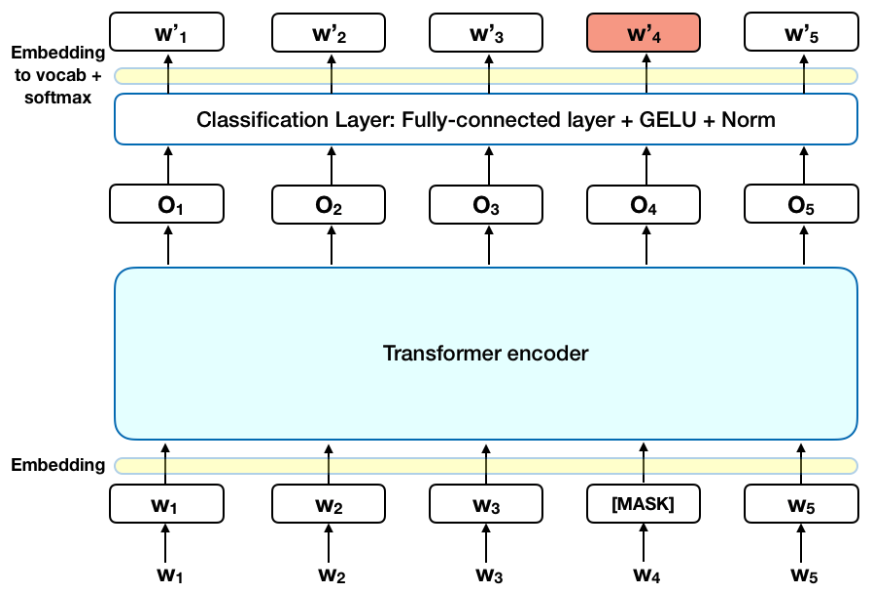

## 2. Exploring Hugging Face Libraries

[HuggingFace](https://huggingface.co) is a unique GitHub for the deep learning world of NLP, allowing users to share their models. Currently, the platform hosts over 60k models (including pre-trained heavy transformers), 6k datasets, and 6k demonstration examples.

In addition to the hub, HuggingFace develops and maintains the `transformers` library, which offers many useful features, including tokenizers, implementations of various transformers, dataset wrappers, and functionality for downloading them, as well as a model trainer (similar to PyTorch Lightning). This library allows users to load and apply (or fine-tune) pre-trained models in just a few lines of code. It is most commonly used in natural language processing tasks but also includes models for computer vision, audio processing, video processing, and more. The list of available models and supported frameworks can be found on the main page of the [documentation](https://huggingface.co/docs/transformers/index).

But that's not all! HuggingFace also develops and supports the `datasets` library, which facilitates working with datasets for NLP, computer vision, audio processing, and more. With this library, it's easy and fast to explore and prepare datasets for deep learning model applications, and it provides access to data streaming (i.e., usage without loading onto the local machine). This is especially useful when dealing with a large amount of data and limited local resources. More details about the library can be found in the [documentation](https://huggingface.co/docs/datasets/index).

Let's start with `transformers`. Here's an example using [BertTokenizer](https://huggingface.co/bert-base-cased):


In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from transformers import BertTokenizer

# Main interface for loading the model/tokenizer:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# Alternatively, you can load the model/tokenizer by specifying the directory:
# BertTokenizer.from_pretrained("/home/saved/my_awesome_tokenizer/")

# If you made changes, you can save the model/tokenizer in a similar way:
# tokenizer.save_pretrained("/home/saved/directory_on_my_computer")

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [3]:
print("Tokenize: ", tokenizer.tokenize("Let's do tokenization!"))
print("Tokenize and convert to indices: ", tokenizer("Let's do tokenization!"))
print(
    "Decode: ",
    tokenizer.decode(tokenizer("Let's do tokenization!")["input_ids"])
)


Tokenize:  ['Let', "'", 's', 'do', 'token', '##ization', '!']
Tokenize and convert to indices:  {'input_ids': [101, 2421, 112, 188, 1202, 22559, 2734, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
Decode:  [CLS] Let's do tokenization! [SEP]


- `token_type_ids` and `attention_mask` are additional values that may be useful when using different models. For example, if you are working on a language modeling task, you might want to use `attention_mask` to mask what the model needs to predict (e.g., the second half of the sentence).

- `[CLS]` and `[SEP]` are special tokens used during the training of BERT model. The first one is used to predict whether part B is the sentence immediately following part A, and the second one is a separator token. The tokenizer has automatically added them in this case, but sometimes you may need to add them manually.

**Important:** We used tokenizer for the bert-base-cased model. Each pre-trained model has its own tokenizer, and it's crucial to use the appropriate one for fine-tuning or inference.

Tokenizers have various batching parameters (truncate, padding, special_tokens, etc.). You can find the complete list [here](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call), and we will implement a specific example.


In [4]:
import torch
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = torch.tensor([[200, 200, 200]])
sequence2_ids = torch.tensor([[200, 200]])
batched_ids = torch.tensor(
    [
        [200, 200, 200],
        [200, 200, tokenizer.pad_token_id],
    ]
)

print(model(sequence1_ids).logits)
print(model(sequence2_ids).logits)
print(model(batched_ids).logits)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3373, -1.2163]], grad_fn=<AddmmBackward0>)


In [5]:
batched_sequences = [
    "I am a human",
    "I am a human and I hate robots very much",
]
batched_ids = tokenizer(batched_sequences)["input_ids"]
batched_ids

[[101, 146, 1821, 170, 1769, 102],
 [101, 146, 1821, 170, 1769, 1105, 146, 4819, 16013, 1304, 1277, 102]]

## 3. Applying a Pre-trained Model using Hugging Face

The `transformers` library provides the option to use pipelines [pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines), which help simplify working with models (and life) for specific tasks.

Let's take a look at applying the pipeline of the `bert-base-uncased` model for the fill-mask task.


In [6]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
unmasker("Hello I'm a [MASK] model.")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[{'score': 0.10731066018342972,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.08774455636739731,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.05338381975889206,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i'm a new model."},
 {'score': 0.04667207598686218,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i'm a super model."},
 {'score': 0.027095964178442955,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i'm a fine model."}]

# GPT

In this section, we will delve into the Generative Pretrained Transformer (GPT), another widely-used transformer model. The content aims to highlight both the similarities and differences between GPT and BERT, another prominent transformer model.

## Similarities with BERT:
- Both models utilize transformer blocks with attention mechanisms and positional encoding.
- BPE tokenization is employed in both models.
- Language modeling is the primary task for both BERT and GPT.
- Self-attention is the exclusive attention mechanism used in both architectures.

## Differences from BERT:
- GPT functions as a decoder model, whereas BERT is an encoder model.
- BERT is trained on tasks like Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). In contrast, GPT is an autoregressive model focusing on text generation.
- BERT considers the entire input text during processing, while GPT calculates attention for each token based only on preceding tokens.
- In GPT, the primary task involves text generation, and pre-trained models are often used without fine-tuning or fine-tuned for generating specific texts. BERT, on the other hand, is commonly used for embeddings and fine-tuning on specific tasks like classification.

### Key Feature of GPT:
GPT models, once pre-trained, can be directly applied to target tasks (e.g., classification) without additional fine-tuning. This is achieved through text generation, where the input sequence is appropriately formulated for the desired output. Zero-shot learning and few-shot learning are strategies employed for this purpose.

- **Zero-shot learning:** Pre-trained GPT is used out of the box for a target task by formulating the input sequence appropriately.
- **Few-shot learning:** The model is provided with examples of the desired behavior, and it is asked to continue the pattern. This does not involve fine-tuning, and relevant context (prompts) must be provided on each run.

Another notable characteristic of GPT models is their substantial size. The largest GPT-3 model, with 175 billion parameters, is not publicly available and is accessible through an API ([https://openai.com/api/](https://openai.com/api/)). Smaller variants, including those for specific languages like Russian (RuGPT-3 from Sber), are available and can be explored using Hugging Face.

This README aims to provide a comprehensive overview of GPT, emphasizing its applications, differences from BERT, and key features that make it a powerful tool for various natural language processing tasks.


In [7]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

DEVICE = torch.device("cuda:0")

model_name_or_path = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path).to(DEVICE)

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [8]:
# Prompt Engineering
text = "Question: 'What is 2+2?'\n Answer: "  # works
# text = "Question: 'What is 3+3?'\n Answer: 6. Question: 'What is 1+9?'\n Answer: 10. Question: 'What is 4+2?'\n Answer:"  # not very effective
input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)
out = model.generate(input_ids, do_sample=False)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Question: 'What is 2+2?'
 Answer:  "The answer is 2+


In [17]:
# Let's take some text
text = "Outside the window, it's raining. Cold and"
input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)

In [18]:
# If you run it again, the result will not change
# But there is no looping here because the model looks further back than two tokens in the past
out = model.generate(input_ids, do_sample=False, max_length=50)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Outside the window, it's raining. Cold and wet.

"I'm sorry, I'm sorry," she says. "I'm sorry. I'm sorry. I'm sorry. I'm sorry. I'm sorry. I'm sorry


To choose a random word at each step based on the distribution, simply change `do_sample` to True. This way, the result will vary each time.


In [19]:
out = model.generate(input_ids, do_sample=True,
                     top_k=0,
                     max_length=50)


generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Outside the window, it's raining. Cold and wet.

This by no means signifies what awaits spirits in the upcoming Black Vortex's time: On a street corner corner, maybe somewhere in an Appalachian mansion on Yamhill Road in 2011. I


But random selection can be too unpredictable, as sometimes very unlikely words may be chosen. There are several parameters that help control randomness.


### top_k

This parameter limits the number of words from which we sample. Setting it to 10 means that we choose only from the 10 most probable words.
In the cell above, we set `top_k = 0` because, by default, it is set to 50, and we wanted to try without it.


The higher the `top_k`, the more random the result will be, but too low values for `top_k` may negatively impact diversity.


In [20]:
for top_k in [1,3,10, 30, 100]:

    out = model.generate(input_ids, do_sample=True,
                     top_k=top_k,
                     max_length=50)


    generated_text = list(map(tokenizer.decode, out))[0]
    print("### text with top_k - ", top_k)
    print(generated_text)
    print()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with top_k -  1
Outside the window, it's raining. Cold and wet.

"I'm sorry, I'm sorry," she says. "I'm sorry. I'm sorry. I'm sorry. I'm sorry. I'm sorry. I'm sorry



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with top_k -  3
Outside the window, it's raining. Cold and wet. The wind blows. It's a cold, wet, wet, wet, wet and wet. It's a cold and wet and wet and wet, and then you feel it.





The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with top_k -  10
Outside the window, it's raining. Cold and dark. There's no light outside. We're in the kitchen. We're looking around, but no one's here.

"It looks like we're about to get lost," she says



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with top_k -  30
Outside the window, it's raining. Cold and cold.

Sgt. Bowers said a body was found in the back of a van parked outside of the jail's residence. The car was found by a passerby, and the driver

### text with top_k -  100
Outside the window, it's raining. Cold and windy out front, and the red lights are in various stages of activation, but it's a good indication of what's to come, and if you're interested in the sort of interactive gameplay that



### Sampling with Temperature
Randomness can also be controlled using a parameter called temperature. Temperature alters the distribution - at a low temperature, probabilities shift from low values to high ones (the distribution sharpens), and at a high temperature, probabilities shift from high values to low ones (the distribution smoothes).

Zero temperature means that we simply choose argmax() at each step, while a very high temperature leads to complete randomness. The temperature should be tuned specifically for the task; you can start with 0 and gradually increase it, observing the diversity obtained.

(It is called "temperature" because the formula is derived from physical equations, where this parameter indeed corresponds to temperature.)


In [21]:
for temp in [0.001, 0.1, 0.2, 0.5, 0.7, 1., 5.]:

    out = model.generate(input_ids, do_sample=True,
                     top_k=0,
                     temperature=temp,
                     max_length=50)


    generated_text = list(map(tokenizer.decode, out))[0]
    print("### text with temp - ", temp)
    print(generated_text)
    print()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with temp -  0.001
Outside the window, it's raining. Cold and wet.

"I'm sorry, I'm sorry," she says. "I'm sorry. I'm sorry. I'm sorry. I'm sorry. I'm sorry. I'm sorry



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with temp -  0.1
Outside the window, it's raining. Cold and wet.

"I'm going to go to the bathroom," he says. "I'm going to go to the bathroom."

He's not going to go to the bathroom. He



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with temp -  0.2
Outside the window, it's raining. Cold and wet.

"I'm sorry, I'm sorry," she says. "I'm sorry. I'm sorry."

"I'm sorry," she says. "I'm sorry."



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with temp -  0.5
Outside the window, it's raining. Cold and wet. The rain is starting to pour down on the roof.

"You're not supposed to be here, are you? You're not supposed to be here?"

"I'm



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with temp -  0.7
Outside the window, it's raining. Cold and damp with the usual mixture of warm and cold. It's like in a bath with water in it.

The back door is open and I can see a man in a suit. He is



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### text with temp -  1.0
Outside the window, it's raining. Cold and dirty, and a bounty is up on everyone around in the hole.

"Goodbye, Lincoln Potter," ill media member Judy Grigsby says, dropping her bag into the peg of her

### text with temp -  5.0
Outside the window, it's raining. Cold and creepiconsconscious subs stroll Nikon Stop theirs 96 Pars Frequmajor family Application respiratory spends SteelBrandon increased Designurbatinum signing courts perpetrators shut inaccurate lobsterhumunes Moh Chergus Alto wears erupt Razor Appro python pun



The higher the temperature, the more random the text becomes.


These parameters can be combined to more precisely find the balance between diversity and randomness.


In [22]:
out = model.generate(input_ids,
                     do_sample=True,
                     temperature=0.9,
                     top_k=10,
                     max_length=50,
                    )

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Outside the window, it's raining. Cold and windy.

I'm going to get the phone number.

The first thing I do is go to the phone and call. I call a number and call the manager and tell them


The temperature is high, but the text still turns out to be somewhat thematically connected.


### Beam Search

The approaches mentioned above have a drawback - at each step, only 1 word is chosen, and this choice cannot be altered. Therefore, one incorrectly chosen word can spoil the entire text, and controlling this with temperature and top-k is challenging.

This is where beam search is useful. Essentially, it involves generating multiple texts simultaneously, and in the end, the text with the highest overall probability is selected. Generating all possible variants is technically impossible (because the number of variations grows very rapidly). Therefore, in beam search, options are pruned at each step so that the number of current options is not greater than N. This parameter N (beam size) is adjustable, but setting it too high is not feasible, as it would lead to too many combinations and increase the generation time.


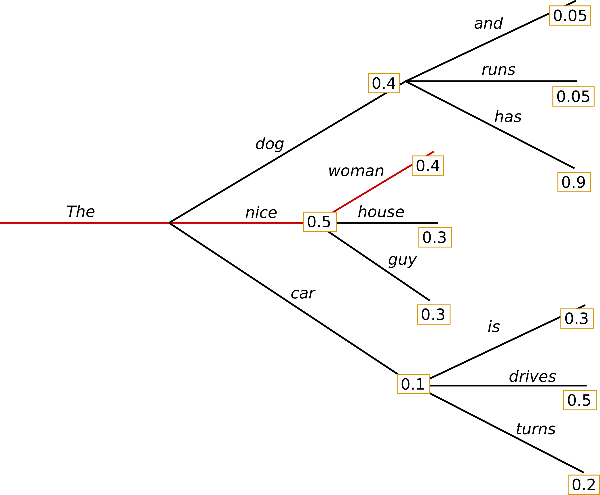

- https://huggingface.co/blog/how-to-generate

In [23]:
# Beam Search is already implemented in Hugging Face, so you only need to set the parameter num_beams
out = model.generate(input_ids, do_sample=True, num_beams=5, top_k=0, max_length=60)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text.replace('<s>', ' '))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Outside the window, it's raining. Cold and wet.

"What are you doing?" he asks.

"I don't know," she says.

"I don't know," he says.

"I don't know," she says.

"I


Fine-tuning example: https://huggingface.co/docs/transformers/en/training

Deployment guides:
- https://towardsdatascience.com/building-nlp-web-apps-with-gradio-and-hugging-face-transformers-59ce8ab4a319
- https://www.gradio.app/guides/quickstart#building-your-first-demo
- https://huggingface.co/spaces

- Example of implementation following Karpathy tutorial